In [246]:
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [247]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [248]:
taxi_data=sns.load_dataset('taxis')
taxi_data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


### Getting basic info

In [249]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [250]:
taxi_data.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [251]:
taxi_data.shape

(6433, 14)

In [252]:
taxi_data['other_charges']=taxi_data['total']-(taxi_data['fare']+taxi_data['tip']+taxi_data['tolls'])
taxi_data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,other_charges
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,3.8
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4.3
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,4.3
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,3.8
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,3.3


<AxesSubplot:>

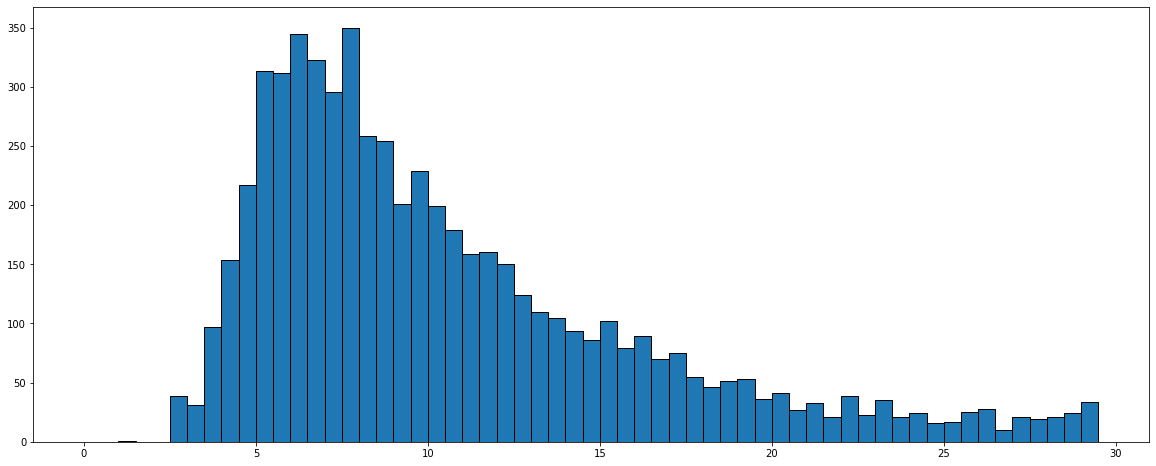

In [253]:
bin_list=[i*0.5 for i in range(0,60)]
taxi_data['fare'].hist( figsize=(20,8), grid=False, bins=bin_list, edgecolor='black')

In [254]:
taxi_data['payment'].value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [255]:
taxi_data.shape

(6433, 15)

In [256]:
taxi_data['other_charges'].describe()

count    6433.000000
mean        3.122229
std         1.142510
min         0.000000
25%         3.300000
50%         3.300000
75%         3.800000
max         7.800000
Name: other_charges, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x159e16ae910>,
 'caps': [<matplotlib.lines.Line2D at 0x159dee494f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x159e16aedf0>],
 'medians': [<matplotlib.lines.Line2D at 0x159dee49280>],
 'fliers': [<matplotlib.lines.Line2D at 0x159e4e9d490>],
 'means': []}

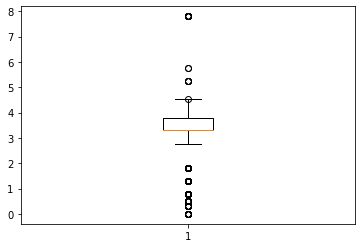

In [257]:
plt.boxplot(data=taxi_data,x='other_charges')

In [258]:
taxi_data['pickup_borough'].value_counts()

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

In [259]:
taxi_data['dropoff_borough'].value_counts()

Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: dropoff_borough, dtype: int64

### Plots

In [260]:
color={'yellow':'y','green':'g'}

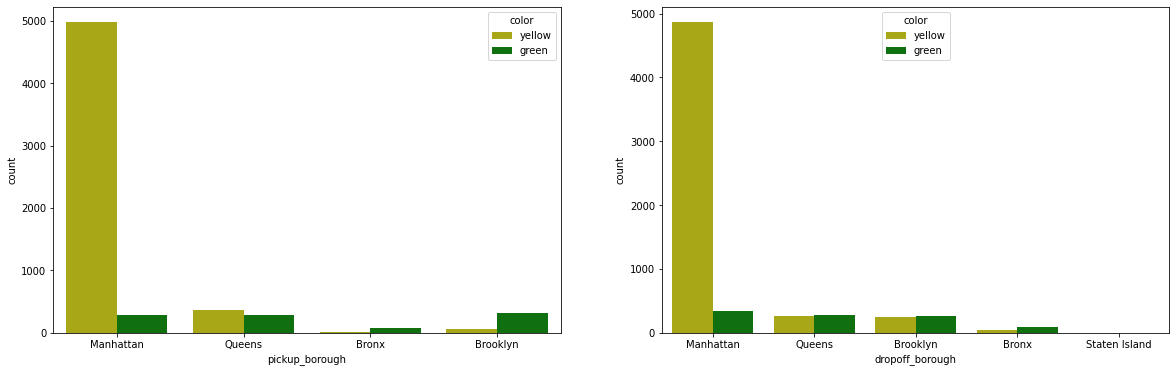

In [261]:
plt.figure(figsize=(20,6))
for index,x in enumerate(['pickup_borough', 'dropoff_borough']):
    plt.subplot(1,2,index+1)
    sns.countplot(data=taxi_data,x=x,hue='color', palette=color)

<AxesSubplot:xlabel='color', ylabel='count'>

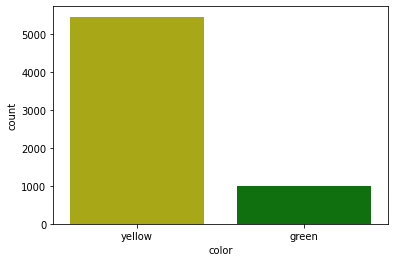

In [262]:
sns.countplot(x='color',data=taxi_data,palette={'yellow':'y','green':'g'})

### Observations:
There are more yellow taxis booked than green taxis

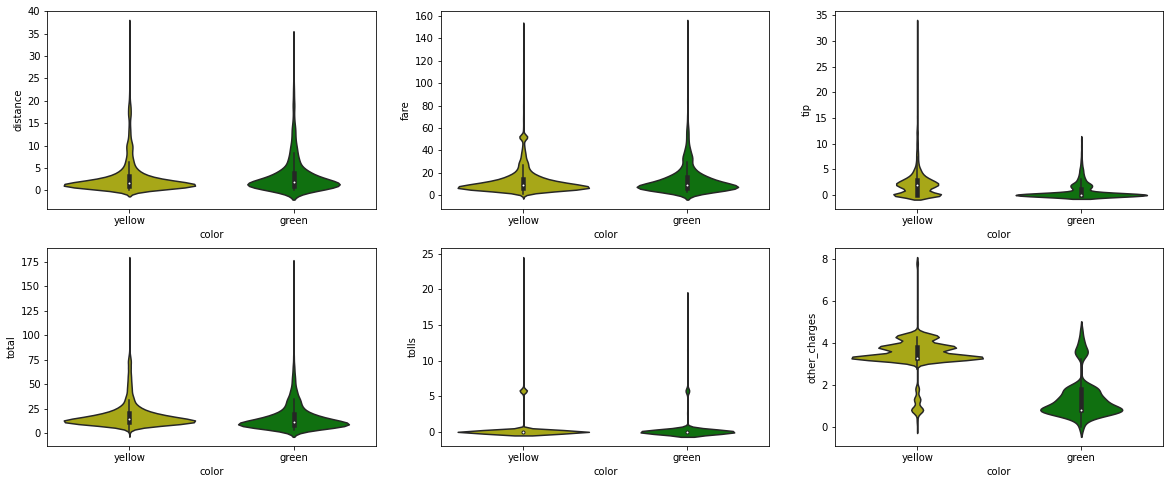

In [263]:
plt.figure(figsize=(20,8))
for index,i in enumerate(['distance','fare','tip','total','tolls','other_charges']):
    plt.subplot(2,3,index+1)
    sns.violinplot(x='color', y=i, data=taxi_data, palette=color)

### Feature engineering

#### Feature extraction

In [264]:
import datetime as dt

Extracting hour and days from pickup column

In [265]:
taxi_data['pickup'] = pd.to_datetime(taxi_data['pickup'])
taxi_data['pickup_hours']=taxi_data['pickup'].dt.hour
taxi_data['pickup_day'] = taxi_data['pickup'].dt.day

In [266]:
taxi_data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,other_charges,pickup_hours,pickup_day
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,3.8,20,23
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4.3,16,4
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,4.3,17,27
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,3.8,1,10
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,3.3,13,30


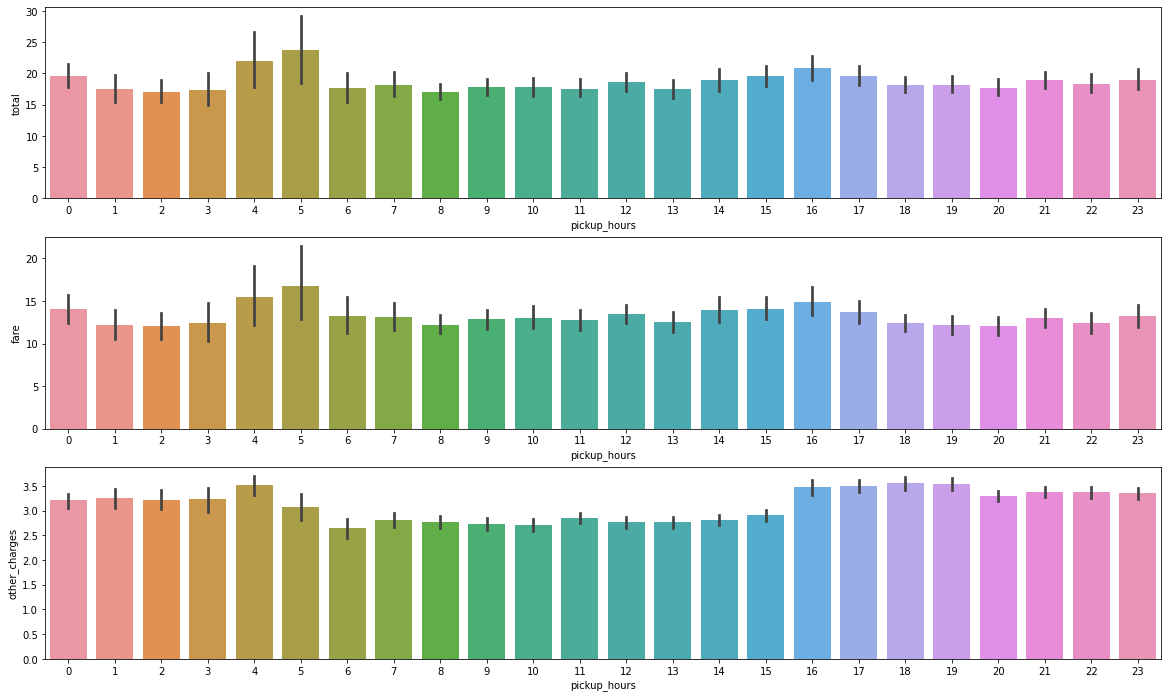

In [267]:
plt.figure(figsize=(20,12))
for index,feature in enumerate(['total','fare','other_charges']):
    plt.subplot(3,1,index+1)
    sns.barplot(x='pickup_hours', y=feature,data=taxi_data)

We can observe that at 4-5am, 15-16pm and 22-23pm prices are high

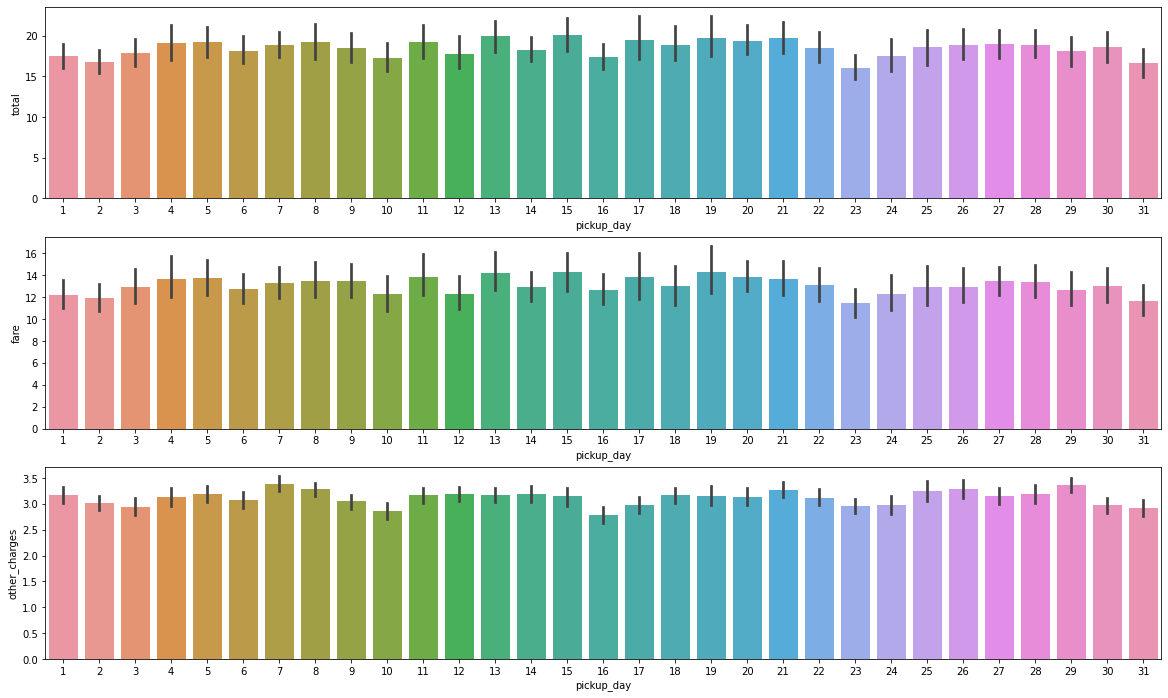

In [268]:
plt.figure(figsize=(20,12))
for index,feature in enumerate(['total','fare','other_charges']):
    plt.subplot(3,1,index+1)
    sns.barplot(x='pickup_day', y=feature,data=taxi_data)

Extracting hour and days from dropoff column

In [269]:
taxi_data['dropoff'] = pd.to_datetime(taxi_data['dropoff'])
taxi_data['dropoff_hours']=taxi_data['dropoff'].dt.hour
taxi_data['dropoff_day'] = taxi_data['dropoff'].dt.day

In [270]:
taxi_data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,other_charges,pickup_hours,pickup_day,dropoff_hours,dropoff_day
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,3.8,20,23,20,23
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4.3,16,4,16,4
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,4.3,17,27,18,27
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,3.8,1,10,1,10
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,3.3,13,30,13,30


In [271]:
taxi_data['pickup_week'] = taxi_data['pickup'].dt.dayofweek
taxi_data['pickup_weekday']= np.where((taxi_data['pickup_week']==5)|(taxi_data['pickup_week']==6),'weekend','weekday')


In [272]:
taxi_data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,dropoff_zone,pickup_borough,dropoff_borough,other_charges,pickup_hours,pickup_day,dropoff_hours,dropoff_day,pickup_week,pickup_weekday
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,...,UN/Turtle Bay South,Manhattan,Manhattan,3.8,20,23,20,23,5,weekend
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,...,Upper West Side South,Manhattan,Manhattan,4.3,16,4,16,4,0,weekday
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,...,West Village,Manhattan,Manhattan,4.3,17,27,18,27,2,weekday
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,...,Yorkville West,Manhattan,Manhattan,3.8,1,10,1,10,6,weekend
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,...,Yorkville West,Manhattan,Manhattan,3.3,13,30,13,30,5,weekend


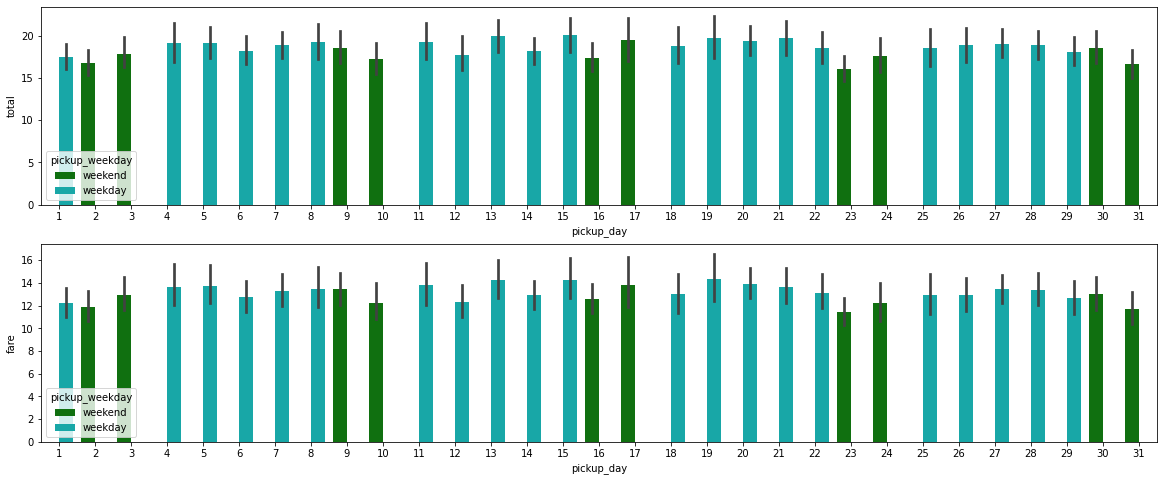

In [273]:
plt.figure(figsize=(20,8))
for index,feature in enumerate(['total','fare']):
    plt.subplot(2,1,index+1)
    sns.barplot(x='pickup_day', y=feature,data=taxi_data,hue='pickup_weekday',palette={'weekend':'g','weekday':'c'})

Extracting Journey duration

In [274]:
taxi_data['travel_duration_in_min']=round((pd.to_datetime(taxi_data['dropoff']) - pd.to_datetime(taxi_data['pickup']))/pd.Timedelta(minutes=1),0)

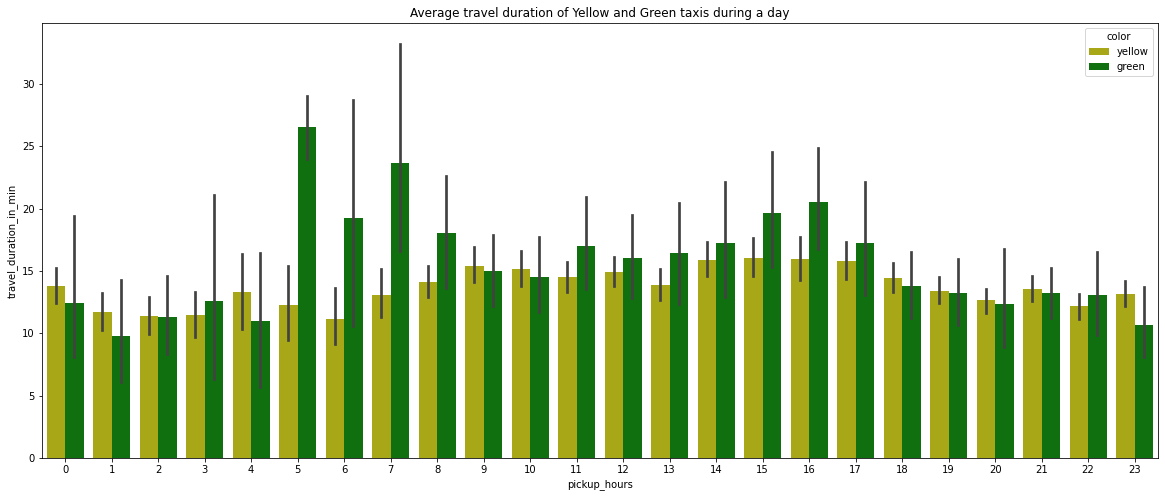

In [287]:
plt.figure(figsize=(20,8))
sns.barplot(data=taxi_data,x='pickup_hours', y='travel_duration_in_min',hue='color',palette=color)
plt.title('Average travel duration of Yellow and Green taxis during a day')
plt.show()

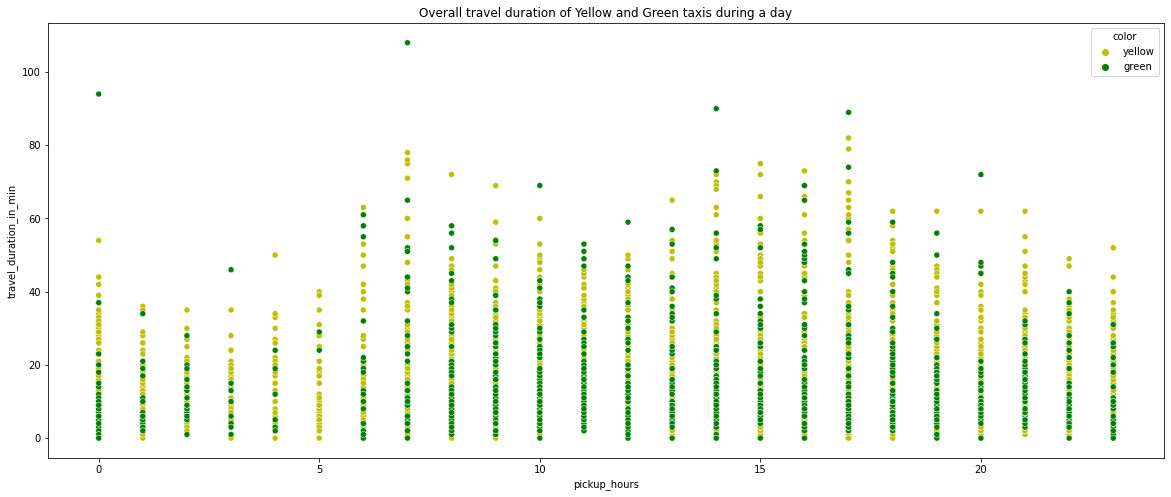

In [288]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='pickup_hours', y='travel_duration_in_min', data=taxi_data,hue='color', palette=color)
plt.title('Overall travel duration of Yellow and Green taxis during a day')
plt.show()